# Store Sales - Time Series Forecasting

## Introduction

Trình bày sơ bộ dự án làm gì, data từ đâu, v.v

### Download and import libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

#### EDA for train data

In [17]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')

stores_df = pd.read_csv('../dataset/stores.csv')
transactions_df = pd.read_csv('../dataset/transactions.csv')
holidays_df = pd.read_csv('../dataset/holidays_events.csv')
oil_df = pd.read_csv('../dataset/oil.csv')

In [18]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [19]:
print(f"Shape of train_df: {train_df.shape}")

Shape of train_df: (3000888, 6)


In [20]:
print(f"Train data: {train_df['date'].min()} to {train_df['date'].max()}")

Train data: 2013-01-01 to 2017-08-15


In [21]:
train_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

##### Check data amount by time periods: weeks, months, years

In [61]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['day_of_week'] = train_df['date'].dt.dayofweek
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year

In [63]:
train_df.describe()

,id,date,store_nbr,sales,onpromotion,day_of_week,month,year
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00,2.997031e+00,6.207838e+00,2.014838e+03
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.013000e+03
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.014000e+03
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,3.000000e+00,6.000000e+00,2.015000e+03
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00,5.000000e+00,9.000000e+00,2.016000e+03
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,6.000000e+00,1.200000e+01,2.017000e+03
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01,2.000740e+00,3.385668e+00,1.345518e+00


#### EDA for sales column of train data

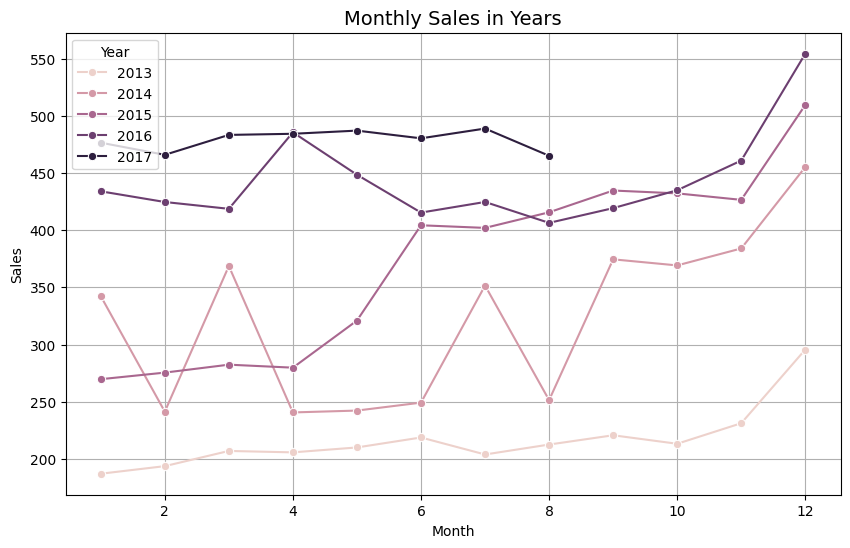

In [119]:
# sales by time periods
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='month', y='sales', hue='year', marker='o', errorbar=None)
plt.title('Monthly Sales in Years', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year', loc='upper left')
plt.grid(True)
plt.show()

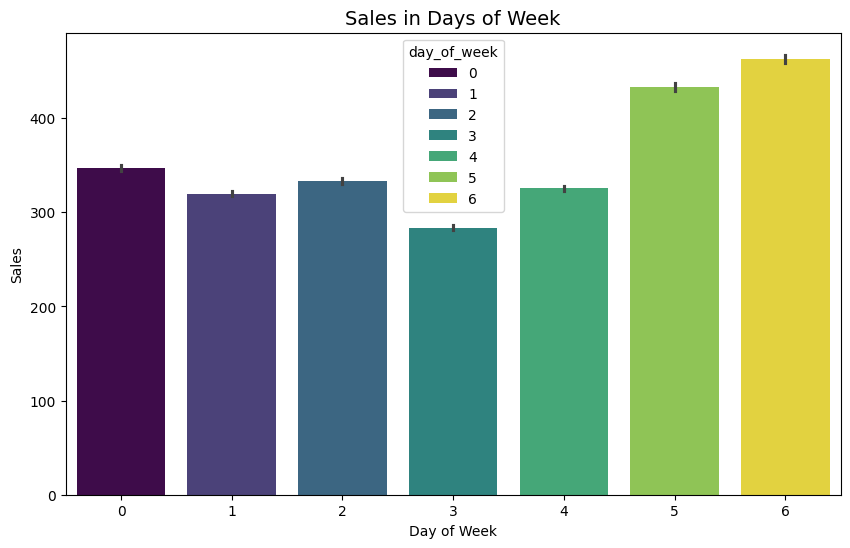

In [93]:
# sales by time periods
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='day_of_week', y='sales', hue='day_of_week', palette='viridis')  

plt.title('Sales in Days of Week', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Sales')
            
plt.show()

Note:
- Sales in December of each year is always highest, that maybe because people tend to prepare for their end year holidays like Christmas, as well as new year upcoming events
- Sales keep growing continuously through years (2013 - 2017). This is obvious since population keep growing through these years and standard of living is level up.
- During each year, in general, sales keep increasing from January to February.
- However there are some abnormal data points. Such as in year 2014, sales has go up significantly in month 3 and 7, then go down deeply in next month.
- Sales by days of week represents that people tend to buy more in the weekend, Saturdays and Sundays.  

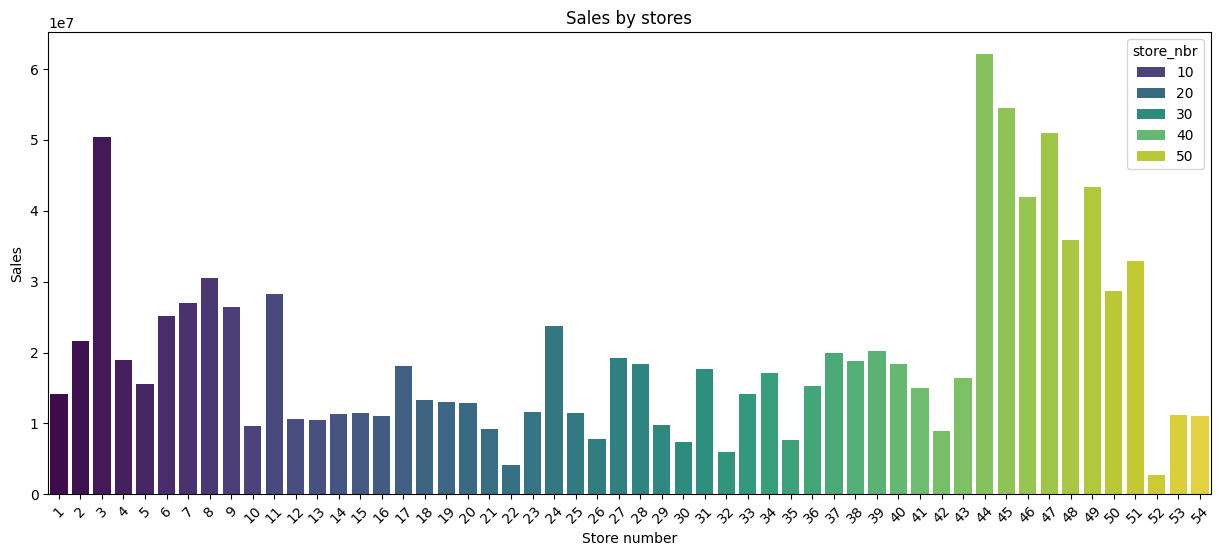

In [94]:
store_sales = train_df.groupby('store_nbr')['sales'].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(data=store_sales, x='store_nbr', y='sales', hue='store_nbr', palette='viridis')
plt.title('Sales by stores')
plt.xlabel('Store number')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


Note:
- Stores 3, 44, 45, 47 and 49 are having significantly highest sales value throughout years
- While stores 1, 10, from 12 to 42 and 52, to 54 seems to have low sales
- We will combine stores data later to figure out more details reason

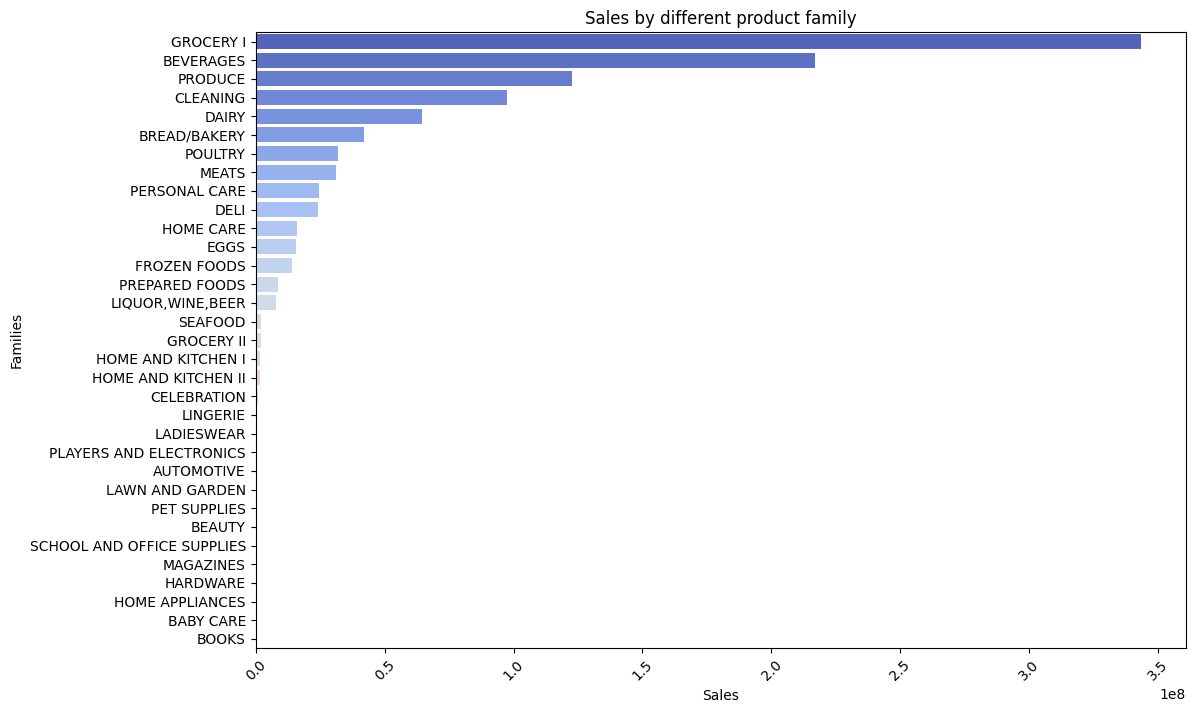

In [41]:
# Sales by product families
family_sales = train_df.groupby('family')['sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(
    data=family_sales,
    x='sales',
    y='family',
    hue='family',  # Gắn giá trị hue
    dodge=False,   # Tắt phân tách nhóm
    palette='coolwarm', 
    legend=False   # Không hiển thị chú thích
)
plt.title('Sales by different product family')
plt.xlabel('Sales')
plt.ylabel('Families')

# Xoay nhãn trên trục x
plt.xticks(rotation=45)
plt.show()


In [42]:
family_sales

,family,sales
0,GROCERY I,3.434627e+08
1,BEVERAGES,2.169545e+08
2,PRODUCE,1.227047e+08
3,CLEANING,9.752129e+07
4,DAIRY,6.448771e+07
5,BREAD/BAKERY,4.213395e+07
6,POULTRY,3.187600e+07
7,MEATS,3.108647e+07
8,PERSONAL CARE,2.459205e+07
9,DELI,2.411032e+07


Note:
- Sales of grocery I, beverages, produce and cleaning are having top highest sales and much bigger than sales of many other categories.
    + Grocery I, Produce and Cleaning products are necessary goods for life.
    + Grocery I refers to staple foods and daily necessities, meaning they are essential for households, leading to consistent purchasing patterns.
    + Produce (fresh fruits and vegetables) and Cleaning products are not only frequent purchases but also necessities, especially for families and individuals who need to restock regularly.
    + Beverage is accross age groups and easily be bought by people everytime they feel thirsty, therefore it is supposed to have high sales volume.
- Follow ups are food mechandises, such as diary products, meat and poultry. They have high sales because they are ingredients for meals for many households, but the frequency to buy them is not too often as necessities above.
- The third high group is products for caring, like home caring or personal caring, this is reasonable with human needs for life. After basics needs, we tend to be concern about take care of ourselves and our homes.
- Next group is instance foods and drinks.
- Finally are products that are optional, not basic needs, and often used for a specific age group. They are good to use for a long time, thus takes long period to restock with a new one. Some of them also cost highly, which is suitable for only a small group of people who have high income.

#### EDA for test data

In [30]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [31]:
print(f"Shape of test_df: {test_df.shape}")

Shape of test_df: (28512, 5)


In [43]:
test_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [64]:
test_df.describe()

,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,6.965383
std,8.230850e+03,15.586057,20.683952
min,3.000888e+06,1.000000,0.000000
25%,3.008016e+06,14.000000,0.000000
50%,3.015144e+06,27.500000,0.000000
75%,3.022271e+06,41.000000,6.000000
max,3.029399e+06,54.000000,646.000000


In [44]:
print(f"Test data: {test_df['date'].min()} to {test_df['date'].max()}")

Test data: 2017-08-16 to 2017-08-31


In [161]:
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['month'] = test_df['date'].dt.month
test_df['year'] = test_df['date'].dt.year

Note: 
- Train dataset is sales in many years, from 2013 to August 15th of 2017
- Test data requires us to predict sales for those stores in the next 15 days from train set.

#### EDA for stores data

In [45]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [46]:
print(f"Shape of stores_df: {stores_df.shape}")

Shape of stores_df: (54, 5)


In [47]:
stores_df.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [ ]:
# visualize stores data

<Axes: xlabel='type'>

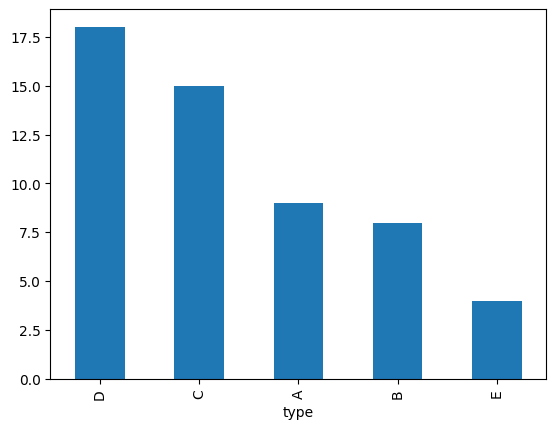

In [67]:
# Distribution of store types
stores_df['type'].value_counts().plot(kind='bar')

<Axes: xlabel='cluster'>

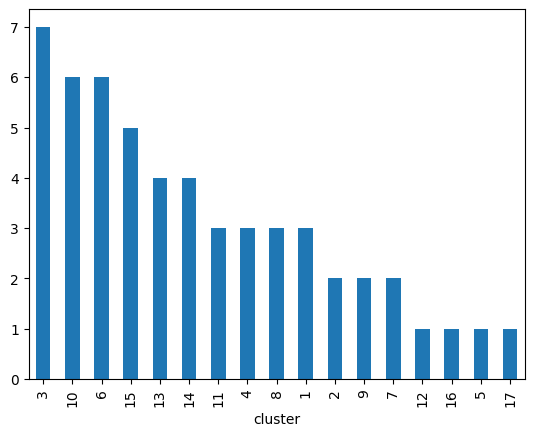

In [68]:
# Distribution of clusters
stores_df['cluster'].value_counts().plot(kind='bar')

Note:  
- There are 54 stores in the dataset
- Types C and D have most stores in the dataset
- Clusters 3, 10, 6 and 15 are clusters with highest amount of stores


#### EDA for transactions data

In [75]:
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [49]:
print(f"Shape of transactions_df: {transactions_df.shape}")

Shape of transactions_df: (83488, 3)


In [50]:
transactions_df.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [109]:
transactions_df.describe()

,date,store_nbr,transactions,day_of_week,month,year
count,83488,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000
mean,2015-05-20 16:07:40.866232064,26.939237,1694.602158,2.995892,6.240801,2014.907041
min,2013-01-01 00:00:00,1.000000,5.000000,0.000000,1.000000,2013.000000
25%,2014-03-27 00:00:00,13.000000,1046.000000,1.000000,3.000000,2014.000000
50%,2015-06-08 00:00:00,27.000000,1393.000000,3.000000,6.000000,2015.000000
75%,2016-07-14 06:00:00,40.000000,2079.000000,5.000000,9.000000,2016.000000
max,2017-08-15 00:00:00,54.000000,8359.000000,6.000000,12.000000,2017.000000
std,NaN,15.608204,963.286644,2.000143,3.374489,1.346804


In [79]:
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
transactions_df['day_of_week'] = transactions_df['date'].dt.dayofweek
transactions_df['month'] = transactions_df['date'].dt.month
transactions_df['year'] = transactions_df['date'].dt.year

Visualize transactions data

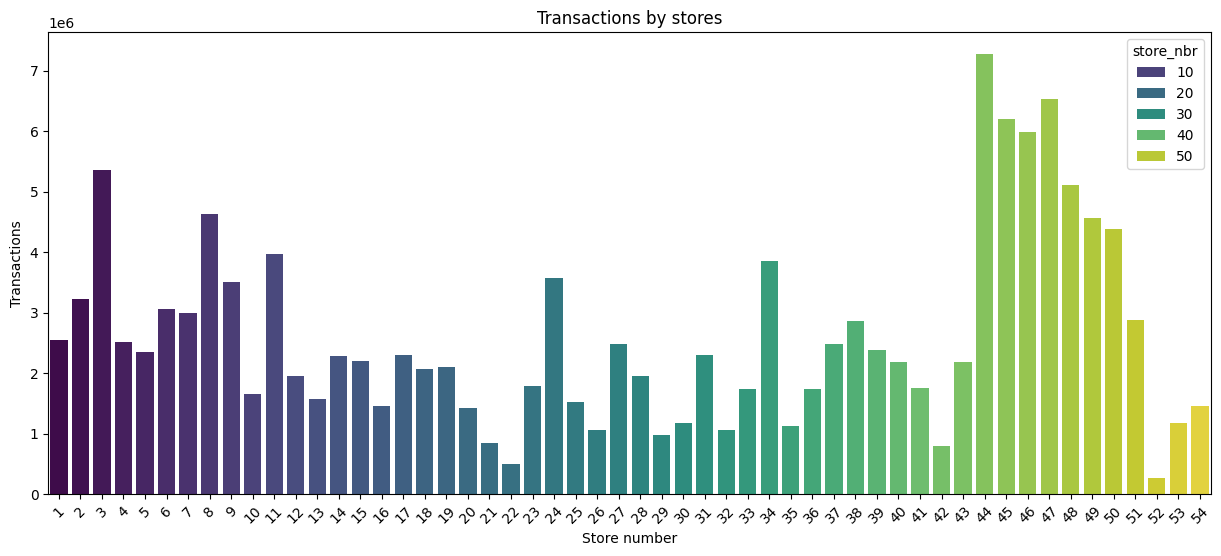

In [95]:
# Transaction amount group by stores
transactions_stores = transactions_df.groupby('store_nbr')['transactions'].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(data=transactions_stores, x='store_nbr', y='transactions', hue='store_nbr', palette='viridis')
plt.title('Transactions by stores')
plt.xlabel('Store number')
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.show()

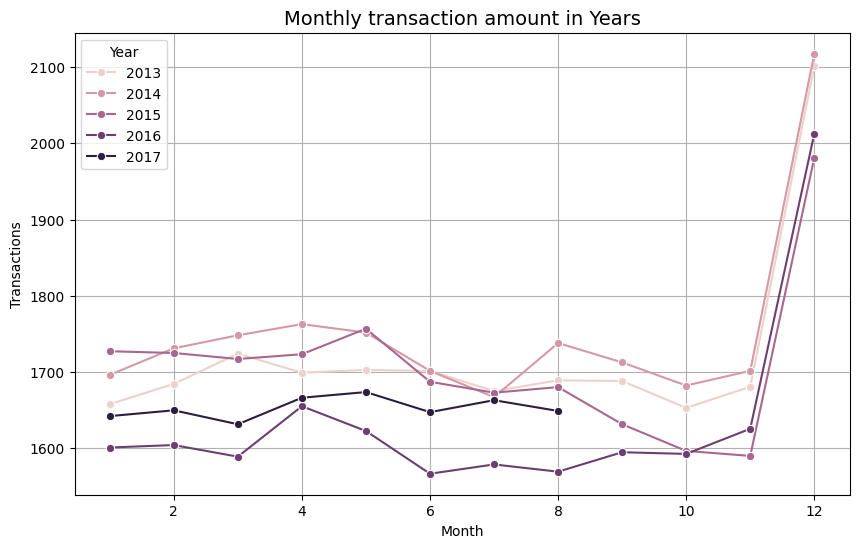

In [86]:
# Transaction amount group by months through years
plt.figure(figsize=(10, 6))
sns.lineplot(data=transactions_df, x='month', y='transactions', hue='year', marker='o', errorbar=None)
plt.title('Monthly transaction amount in Years', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Transactions')
plt.legend(title='Year', loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Combine transactions and train data together to analyze => relationship between transactions and sales prediction

Note

- Data of transactions is the number of transactions in each store each day
- Transactions in December is extremely high compared to other months, which consolidate to the insight that sales go up in the end of each year
- Amount of transactions is relatively proportional with sales value, when group by stores.
- However, amount of transactions group by years is not increased after years. The evidence is that year 2013 has more transactions than year 2016 and 2017, while sales data in train dataset indicates that sales value increase by years.
  => Goods prices are grow up through years.

#### EDA for holidays data

In [51]:
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [52]:
print(f"Shape of holidays_df: {holidays_df.shape}")

Shape of holidays_df: (350, 6)


In [53]:
holidays_df.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [96]:
holidays_df['date'] = pd.to_datetime(holidays_df['date'])
holidays_df['day_of_week'] = holidays_df['date'].dt.dayofweek
holidays_df['month'] = holidays_df['date'].dt.month
holidays_df['year'] = holidays_df['date'].dt.year

In [ ]:
# visualize holidays data

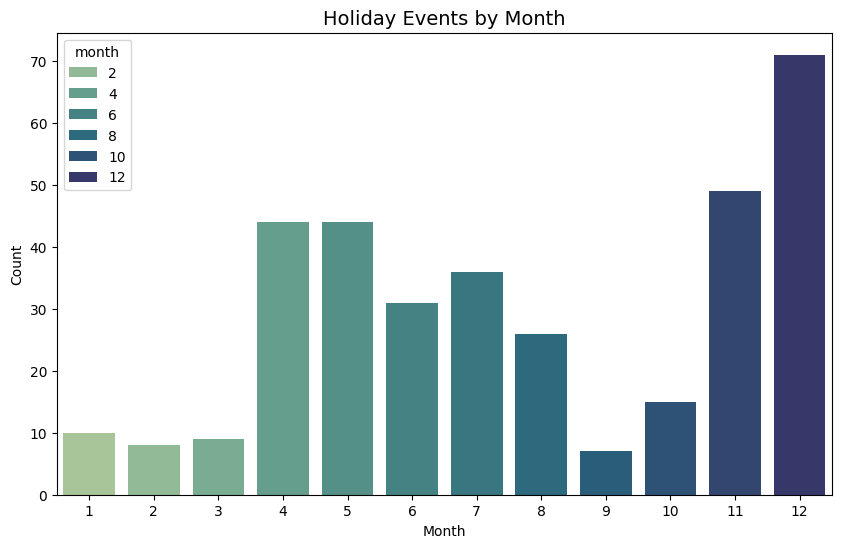

In [105]:
# Kiểm tra số lượng sự kiện theo tháng
plt.figure(figsize=(10, 6))
sns.countplot(data=holidays_df, x='month', hue='month', palette='crest')
plt.title('Holiday Events by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

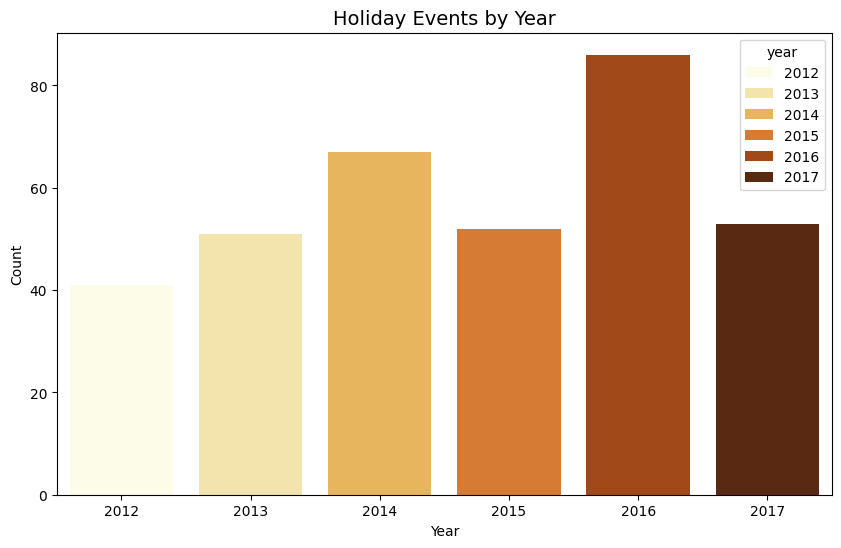

In [103]:
# Kiểm tra số lượng sự kiện theo năm
plt.figure(figsize=(10, 6))
sns.countplot(data=holidays_df, x='year', hue='year', palette='YlOrBr')
plt.title('Holiday Events by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


Note:

- Holidays amounts are different in each year.
- Events occur most in December, suitable with the statistics of transactions and sales above.


#### EDA for oil data

Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

In [107]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [54]:
print(f"Shape of oil_df: {oil_df.shape}")

Shape of oil_df: (1218, 2)


In [55]:
oil_df.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [108]:
oil_df.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [112]:
# Handle missing values of dcoilwtico by median
oil_df.fillna({'dcoilwtico':oil_df['dcoilwtico'].median()}, inplace=True)

In [113]:
oil_df.isna().sum()

date          0
dcoilwtico    0
dtype: int64

In [114]:
oil_df['date'] = pd.to_datetime(oil_df['date'])
oil_df['day_of_week'] = oil_df['date'].dt.dayofweek
oil_df['month'] = oil_df['date'].dt.month
oil_df['year'] = oil_df['date'].dt.year

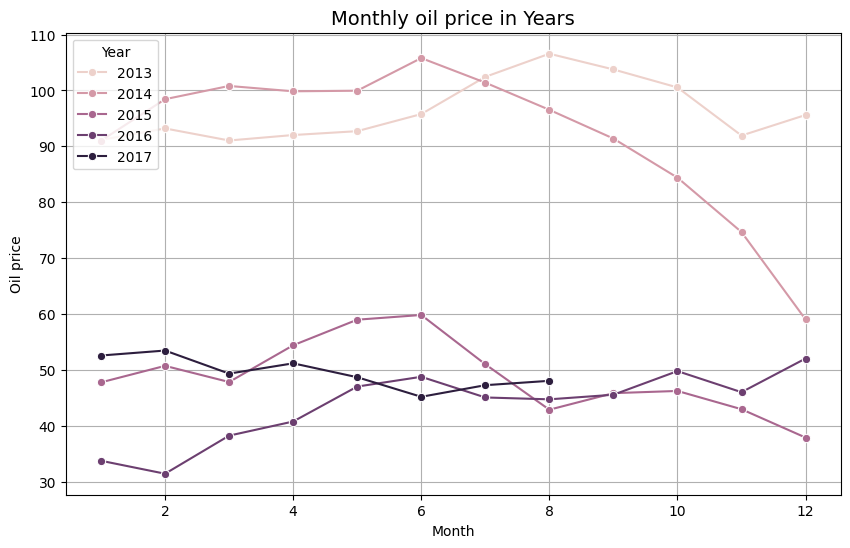

In [118]:
# visualize oil data
plt.figure(figsize=(10, 6))
monthly_avg = oil_df.groupby(['year', 'month'])['dcoilwtico'].mean().reset_index()
sns.lineplot(data=monthly_avg, x='month', y='dcoilwtico', hue='year', marker='o', errorbar=None)
plt.title('Monthly oil price in Years', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Oil price')
plt.legend(title='Year', loc='upper left')
plt.grid(True)
plt.show()

Note:
- Oil price have tendency to decrease through years
- In each year, oil price in December is usually not too high, mostly less than other months.
- Oil price has erratic fluctuations and hard to predict

#### EDA for Merged DFs 

I will merge DFs to figure out possible additional features for my prediction model

In [181]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
transactions_df['date']=pd.to_datetime(transactions_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
holidays_df['date'] = pd.to_datetime(holidays_df['date'])

##### Relationship of sales and transactions

A record in train_df describe sales of each product family of a store in a date.
While a record in transactions_df describe total transactions amount of a store in date.
Therefore to merge them, I need to group train_df by store and date to match with transactions_df

In [144]:
train_df_date_store = train_df.groupby(["date", "store_nbr"]).sales.sum().reset_index();
temp = pd.merge(train_df_date_store, transactions_df, how = "inner")

In [145]:
temp.shape

(83488, 7)

In [146]:
temp

,date,store_nbr,sales,transactions,day_of_week,month,year
0,2013-01-01,25,2511.618999,770,1,1,2013
1,2013-01-02,1,7417.148000,2111,2,1,2013
2,2013-01-02,2,10266.718981,2358,2,1,2013
3,2013-01-02,3,24060.348000,3487,2,1,2013
4,2013-01-02,4,10200.083980,1922,2,1,2013
...,...,...,...,...,...,...,...
83483,2017-08-15,50,16879.121004,2804,1,8,2017
83484,2017-08-15,51,20154.559000,1573,1,8,2017
83485,2017-08-15,52,18600.046000,2255,1,8,2017
83486,2017-08-15,53,8208.189000,932,1,8,2017


In [150]:
correlation = temp[['sales', 'transactions']].corr()
print(correlation)

                 sales  transactions
sales         1.000000      0.837384
transactions  0.837384      1.000000


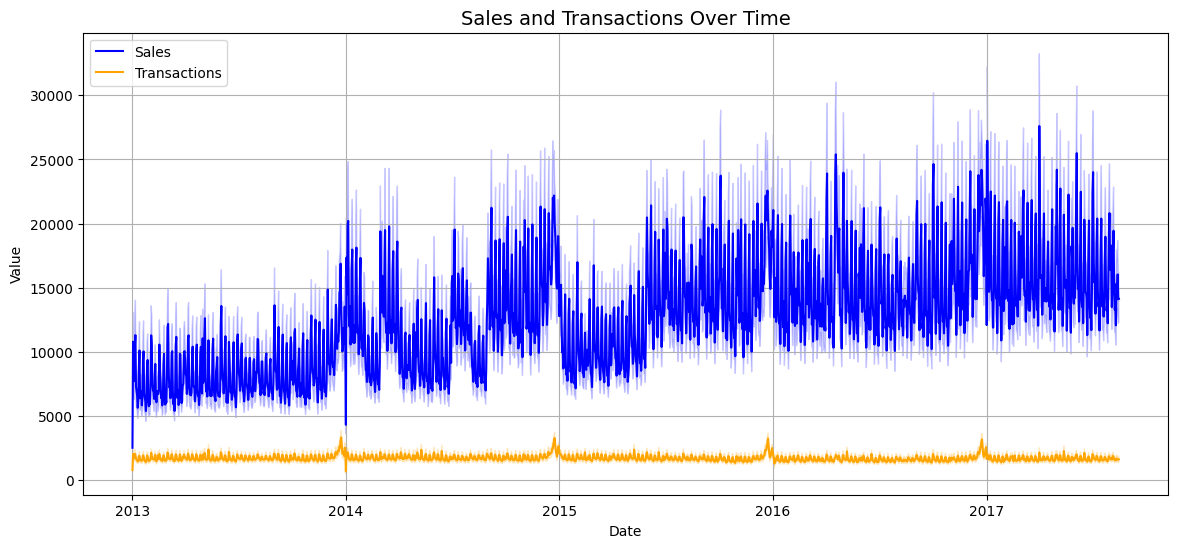

In [147]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=temp, x='date', y='sales', label='Sales', color='blue')
sns.lineplot(data=temp, x='date', y='transactions', label='Transactions', color='orange')
plt.title('Sales and Transactions Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

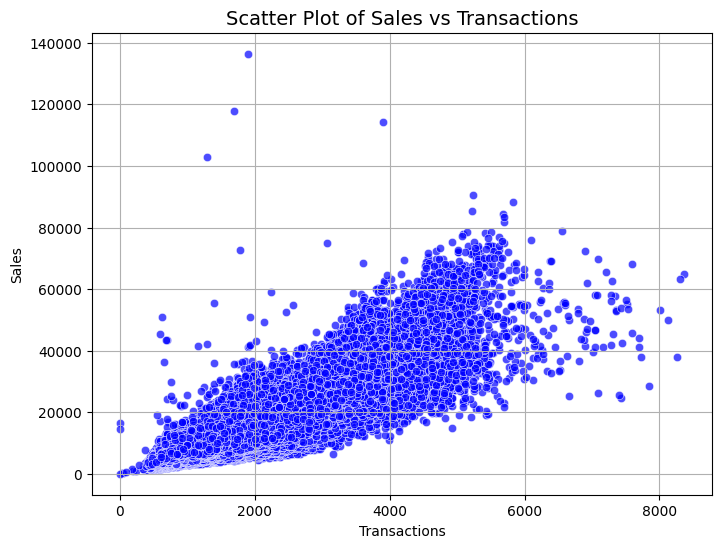

In [148]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=temp, x='transactions', y='sales', alpha=0.7, color='blue')
plt.title('Scatter Plot of Sales vs Transactions', fontsize=14)
plt.xlabel('Transactions')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Note:
- Positive correlation: Most points follow an upward trend, indicating that higher transactions generally lead to higher sales.
- Wide dispersion: There is significant variance, suggesting other factors might influence sales, like transaction value or external factors.
- Outliers: Some points represent stores with unusually high sales despite fewer transactions, potentially due to promotions or special events, when people buy expensive goods, with higher amount than usually per transaction.

##### Relationship between sales and oil price

In [151]:
train_df_date = train_df.groupby(["date"]).sales.sum().reset_index();
temp2 = pd.merge(train_df_date, oil_df, how = "inner")

In [152]:
temp2

,date,sales,dcoilwtico,day_of_week,month,year
0,2013-01-01,2511.618999,53.19,1,1,2013
1,2013-01-02,496092.417944,93.14,2,1,2013
2,2013-01-03,361461.231124,92.97,3,1,2013
3,2013-01-04,354459.677093,93.12,4,1,2013
4,2013-01-07,336122.801066,93.20,0,1,2013
...,...,...,...,...,...,...
1198,2017-08-09,734139.674010,49.59,2,8,2017
1199,2017-08-10,651386.911970,48.54,3,8,2017
1200,2017-08-11,826373.722022,48.81,4,8,2017
1201,2017-08-14,760922.406081,47.59,0,8,2017


In [153]:
correlation = temp2[['sales', 'dcoilwtico']].corr()
print(correlation)

               sales  dcoilwtico
sales       1.000000   -0.674163
dcoilwtico -0.674163    1.000000


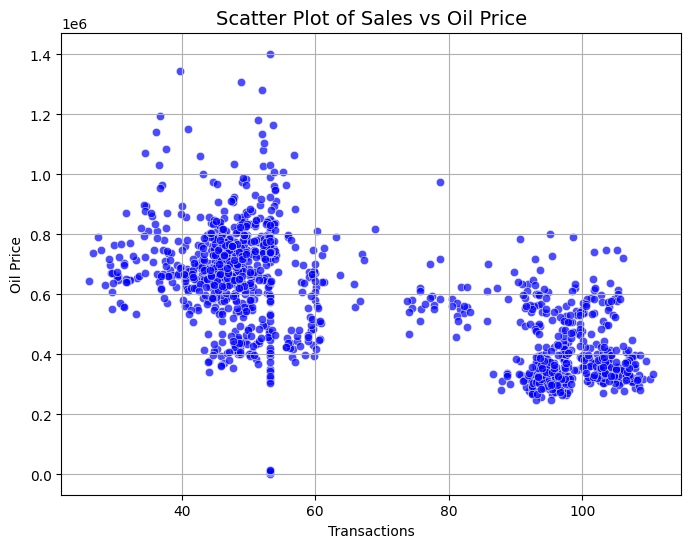

In [156]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=temp2, x='dcoilwtico', y='sales', alpha=0.7, color='blue')
plt.title('Scatter Plot of Sales vs Oil Price', fontsize=14)
plt.xlabel('Transactions')
plt.ylabel('Oil Price')
plt.grid(True)
plt.show()

Note:

- Oil prices affect sales and are inversely proportional.
- This is reasonable because the higher the price, the lower the purchasing power

#### EDA Conclusion:
***0. Data Quality:***
- Only oil price has missing values, other datasets are cleaned well.
  
***1. Sales Patterns***
- Seasonality:
    + December consistently has the highest sales, likely driven by end-of-year holidays like Christmas and New Year events. This indicates strong seasonal trends.
    + Yearly Growth: Sales have steadily increased from 2013 to 2017, reflecting population growth and improved living standards. 
    + Monthly Trends: Sales generally increase from January to December each year. However, some months, like March and July in 2014, exhibit abnormal sales spikes followed by sharp declines, signaling potential events or promotions affecting sales.
    + Weekly Trends: Sales are notably higher on weekends (Saturdays and Sundays), suggesting that customers tend to make larger purchases during these days. This can be useful for daily/weekly sales predictions.

***2. Store-Level Insights***
- High Performers: Stores 3, 44, 45, 47, and 49 consistently show the highest sales across all years, indicating that these stores either have prime locations or better-performing sales strategies.
- Low Performers: Stores 1, 10, 12-42, and 52-54 generally have low sales, which could be attributed to poor location, limited foot traffic, or other operational factors. 

***3. Product Categories***
- Top Sales Categories:
    + Grocery I, Produce, Beverages, and Cleaning consistently have high sales due to their essential nature. These items are staples for households, with frequent restocking needs.
    + Beverages appeal to all age groups and are bought regularly, contributing significantly to sales.
Follow-Up Categories:
    + Dairy, Meat, and Poultry have strong sales but are bought less frequently than the essentials mentioned above.
    + Personal and Home Care Products show steady demand as people prioritize self-care and home maintenance after meeting basic needs.
    + Low Sales Categories: Items like instant foods and optional products (specific to certain age groups) tend to have lower, less frequent sales.

***4. Store Clusters and Types***
- The dataset contains 54 stores, with store types C and D being the most prevalent.
- Clusters 3, 10, 6, and 15 have the most stores, which may reflect patterns in store performance based on their location or operation type. Understanding these clusters could help in further segmenting the data for targeted feature engineering.

***5. Transactions Insights***
- High December Transactions: The number of transactions peaks in December, reinforcing the seasonal spike in sales during the holiday period.
- Transaction-Sales Correlation: There is a strong correlation between transactions and sales, especially when grouped by store. However, there’s a notable discrepancy when transactions are grouped by year, as the number of transactions does not show consistent growth despite increasing sales. 

***6. Economic Indicators***
- Oil Prices and Sales: There is an inverse relationship between oil prices and sales. As oil prices rise, purchasing power diminishes, leading to lower sales. This is important for building features that account for broader economic conditions affecting consumer behavior.

***7. External Events and Holidays***
- Holidays and Events: The number and timing of holidays vary by year, with significant peaks during December. Events such as Black Friday and other promotions likely contribute to spikes in sales and transactions.